# Interior Point Methods

## installation

##### install CVXOPT and CVXPY packages

In [1]:
import cvxopt
import cvxpy
## NOTE: need to change suitesparse package to 4.5.3
## $ conda install -c conda-forge suitesparse==4.5.3

##### install specific CVXOPT packages

In [2]:
## import L1-Regularized LS solver (over- or under- determined)
from cvxopt import l1regls

## import L1-Approx solver (overdetermined)
from cvxopt import l1

## import random normal
from cvxopt import normal

##### install additional Python packages

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt

## examples

##### problem: L1 Norm Approx, non-sparse, underdetermined

     pcost       dcost       gap    pres   dres
 0: -1.4402e+02 -4.3460e+01  2e+02  3e+01  1e-13
 1: -5.0862e+01 -4.3023e+01  2e+01  3e+00  9e-15
 2: -4.3903e+01 -4.1202e+01  8e+00  1e+00  4e-15
 3: -4.0808e+01 -4.0326e+01  3e+00  3e-01  2e-15
 4: -3.9985e+01 -3.9995e+01  8e-01  8e-02  4e-15
 5: -3.9875e+01 -3.9917e+01  3e-01  2e-02  3e-15
 6: -3.9837e+01 -3.9898e+01  9e-02  3e-03  5e-15
 7: -3.9873e+01 -3.9888e+01  2e-02  5e-04  5e-15
 8: -3.9885e+01 -3.9886e+01  1e-03  3e-05  2e-14
 9: -3.9886e+01 -3.9886e+01  7e-05  1e-06  6e-14
10: -3.9886e+01 -3.9886e+01  2e-06  2e-08  4e-13
Optimal solution found.
0.0098991394043
     pcost       dcost       gap    pres   dres
 0: -1.4738e+03 -4.7315e+02  2e+03  1e+02  3e-12
 1: -5.2291e+02 -4.7258e+02  1e+02  5e+00  1e-13
 2: -4.8200e+02 -4.6672e+02  5e+01  2e+00  6e-14
 3: -4.6300e+02 -4.6219e+02  2e+01  6e-01  2e-14
 4: -4.5874e+02 -4.6077e+02  8e+00  2e-01  6e-15
 5: -4.5858e+02 -4.6019e+02  3e+00  5e-02  3e-15
 6: -4.5903e+02 -4.5995e+02  1e

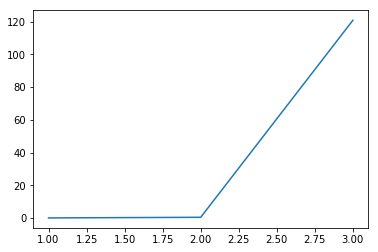

In [9]:
## solver: CVXOPT custom KKT l1regls
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 5*f, 20*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1regls.l1regls(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

In [10]:
## solver: MOSEK via CVXOPT
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 5*f, 20*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1regls.l1regls_mosek(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

WOOOO
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : QO (quadratic optimization problem)
  Constraints            : 400             
  Cones                  : 0               
  Scalar variables       : 400             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Quadratic to conic reformulation started.
Quadratic to conic reformulation terminated. Time: 0.01    
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 352
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :

Error: (1295) The quadratic coefficient matrix in the objective is not positive semidefinite as expected for a minimization problem.

##### problem: L1 Norm Approx, non-sparse, overdetermined

     pcost       dcost       gap    pres   dres
 0: -8.4527e+01 -5.8780e+01  6e+01  2e+01  7e-14
 1: -6.0178e+01 -5.8330e+01  5e+00  1e+00  5e-15
 2: -5.6751e+01 -5.6680e+01  6e-01  1e-01  1e-15
 3: -5.6344e+01 -5.6360e+01  6e-02  1e-02  1e-15
 4: -5.6322e+01 -5.6323e+01  2e-03  9e-05  9e-15
 5: -5.6322e+01 -5.6322e+01  9e-05  1e-06  2e-13
 6: -5.6322e+01 -5.6322e+01  1e-06  1e-08  8e-13
Optimal solution found.
0.0514481067657
     pcost       dcost       gap    pres   dres
 0: -8.1913e+02 -5.6836e+02  5e+02  5e+01  2e-12
 1: -5.8291e+02 -5.6770e+02  3e+01  3e+00  9e-14
 2: -5.6151e+02 -5.6105e+02  5e+00  3e-01  1e-14
 3: -5.5823e+02 -5.5831e+02  7e-01  4e-02  3e-15
 4: -5.5791e+02 -5.5793e+02  7e-02  3e-03  6e-15
 5: -5.5789e+02 -5.5789e+02  2e-03  7e-05  2e-14
 6: -5.5789e+02 -5.5789e+02  5e-05  1e-06  1e-13
 7: -5.5789e+02 -5.5789e+02  1e-06  2e-08  2e-12
Optimal solution found.
0.717604160309
     pcost       dcost       gap    pres   dres
 0: -7.5062e+03 -5.0055e+03  5e+03  2e+02 

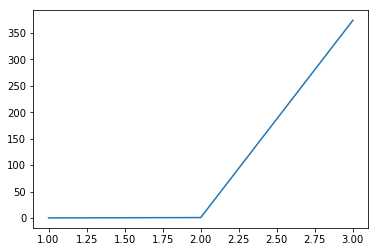

In [11]:
## solver: CVXOPT custom KKT l1regls
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 20*f, 5*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1regls.l1regls(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

WOOOO
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : QO (quadratic optimization problem)
  Constraints            : 100             
  Cones                  : 0               
  Scalar variables       : 100             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Quadratic to conic reformulation started.
Quadratic to conic reformulation terminated. Time: 0.04    
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 52
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   : 

1   7.3e-01  7.3e-01  3.2e+00  2.53e+00   -2.566245702e+03  -2.848606156e+03  7.3e-01  15.82 
2   6.6e-01  6.6e-01  3.8e+01  1.46e+01   -4.647319690e+03  -4.693037149e+03  6.6e-01  18.20 
3   4.8e-01  4.8e-01  3.7e+01  8.94e+00   -4.883893363e+03  -4.889566528e+03  4.8e-01  20.59 
4   5.9e-02  5.9e-02  2.0e+01  1.79e+00   -4.896996923e+03  -4.897471837e+03  5.9e-02  23.08 
5   1.8e-03  1.8e-03  3.9e+00  1.11e+00   -4.897454112e+03  -4.897468051e+03  1.8e-03  26.05 
6   5.6e-05  5.6e-05  2.9e+00  1.00e+00   -4.897430988e+03  -4.897431444e+03  5.6e-05  28.77 
7   1.3e-05  2.5e-05  1.4e+00  1.00e+00   -4.897431566e+03  -4.897431672e+03  1.3e-05  31.35 
8   6.9e-06  2.1e-05  1.0e+00  1.00e+00   -4.897431768e+03  -4.897431826e+03  6.9e-06  34.12 
9   3.4e-06  3.4e-06  7.4e-01  1.00e+00   -4.897432345e+03  -4.897432374e+03  3.4e-06  36.82 
Optimizer terminated. Time: 37.19   


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

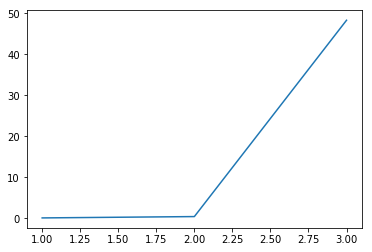

In [12]:
## solver: MOSEK via CVXOPT
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 20*f, 5*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1regls.l1regls_mosek(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

     pcost       dcost       gap    pres   dres   k/t
 0:  1.5122e+02  4.6621e+01  1e+02  8e-17  1e-15  1e+00
 1:  1.5181e+02  8.9798e+01  6e+01  4e-16  2e-14  5e-01
 2:  1.4722e+02  1.1050e+02  4e+01  5e-16  1e-14  2e-01
 3:  1.3499e+02  1.2250e+02  1e+01  3e-16  6e-15  7e-02
 4:  1.3109e+02  1.2629e+02  5e+00  3e-16  5e-15  2e-02
 5:  1.2992e+02  1.2758e+02  2e+00  3e-16  4e-15  9e-03
 6:  1.2900e+02  1.2822e+02  8e-01  5e-16  6e-15  3e-03
 7:  1.2867e+02  1.2844e+02  2e-01  3e-16  2e-14  7e-04
 8:  1.2856e+02  1.2851e+02  6e-02  3e-16  2e-14  1e-04
 9:  1.2853e+02  1.2852e+02  6e-03  4e-16  3e-14  2e-05
10:  1.2853e+02  1.2853e+02  3e-03  4e-16  3e-14  7e-06
11:  1.2853e+02  1.2853e+02  7e-04  3e-16  3e-13  2e-06
12:  1.2853e+02  1.2853e+02  1e-05  4e-16  3e-14  4e-08
Optimal solution found.
0.0214188098907
     pcost       dcost       gap    pres   dres   k/t
 0:  1.4934e+03  4.4767e+02  1e+03  7e-17  7e-15  1e+00
 1:  1.5433e+03  6.6517e+02  9e+02  4e-16  2e-13  8e-01
 2:  1.6170e

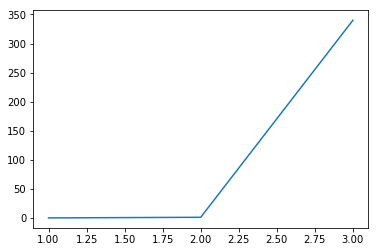

In [13]:
## solver: CVXOPT custom KKT l1
k = 3
times = []
for e in range(1,k+1):    
    f = 10**e
    m, n = 20*f, 5*f
    A, b = normal(m,n), normal(m,1)
    t1 = time.time()
    x = cvxopt.l1.l1(A,b)
    t2 = time.time()
    t = t2-t1
    times.append(t)
    print(t)

plt.plot(range(1,k+1), times)
plt.show()

In [ ]:
# from cvxpy import *
# import numpy

# # Problem data.
# m = 30
# n = 50
# numpy.random.seed(1)
# A = numpy.random.randn(m, n)
# b = numpy.random.randn(m)

# # Construct the problem.
# x = Variable(n)
# objective = Minimize(sum(x) )
# constraints = [0 <= x, numpy.dot(A,x) == b]
# prob = Problem(objective, constraints)

# # The optimal objective is returned by prob.solve().
# result = prob.solve()
# # The optimal value for x is stored in x.value.
# print(x.value)
# # The optimal Lagrange multiplier for a constraint
# # is stored in constraint.dual_value.
# print(constraints[0].dual_value)